# Linear Regression

## Princeton Salary Datasets
- We've learned the theory. Let's get to a real example
- In this task, we will study the impact of various factors (education, experience and gender) on salaries in academia.
- The dataset is a historic dataset of salaries in an academic department and is easy to study.
- According to the website
```
These are the salary data used in Weisberg's book, consisting of observations on six variables for 52 tenure-track professors in a small college.
```

In [62]:
import pandas as pd
import numpy as np
import seaborn as sb
data = pd.read_csv("http://data.princeton.edu/wws509/datasets/salary.dat", sep='\s+')
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


As always, we start with exploring the dataset for a little.

In [59]:
print data.info(), '\n'
print data.head(), '\n'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 6 columns):
sx    52 non-null object
rk    52 non-null object
yr    52 non-null int64
dg    52 non-null object
yd    52 non-null int64
sl    52 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.8+ KB
None 

       sx    rk  yr         dg  yd     sl
0    male  full  25  doctorate  35  36350
1    male  full  13  doctorate  22  35350
2    male  full  10  doctorate  23  28200
3  female  full   7  doctorate  27  26775
4    male  full  19    masters  30  33696 



First note we only have a very limited set of data points (52 rows).

As we can read on the [Princeton website](http://data.princeton.edu/wws509/datasets/#salary), these columns mean the following:
- sx = Sex: male or female,
- rk = Rank: full, associate or assistant professor,
- yr = Number of years in current rank,
- dg = Highest degree: doctorate or masters,
- yd = Number of years since highest degree was earned,
- sl = Academic year salary, in dollars.

### Salary Distribution

Let's view the distribution of salaries first.

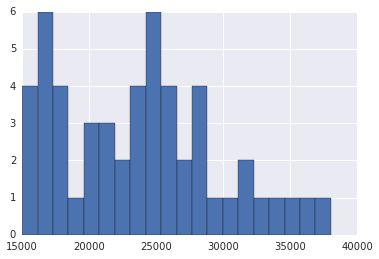

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline
f = data.sl.hist(bins=20)
# f = plt.hist(data.sl, bins=20) #Same thing

### What correlates with salary?

Next, we would want to what factors may be correlated with salary.  We would expect that as **experience** or **education** increases, the salary should increases as well.

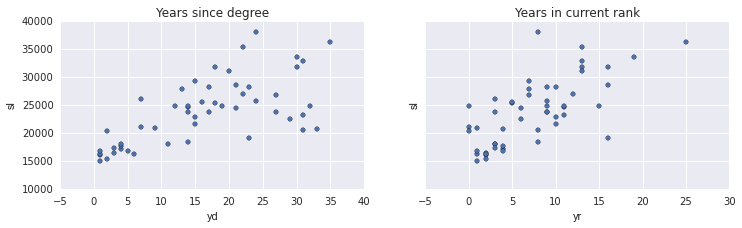

In [64]:
fig, axes = plt.subplots(ncols=2,sharey=True)  #Force both subplots to use the same y axis
f = data.plot(kind='scatter', x='yd', y='sl', ax=axes[0], title="Years since degree", figsize=(12,3))
f = data.plot(kind='scatter', x='yr', y='sl', ax=axes[1], title="Years in current rank")

- Most importantly, while using **linear** regression, we should see if the relationship is **linear**.  
- Does every increase in X lead to a constant increase in Y?  We may expect for the first 5-10 year of experience this true, but perhaps after 10 year the salaries stop increasing or jump dramatically--Linear regression would be unable to capture these nonlinearities (Unless we transform the data)

### sklearn

We will first use the **linear_model** module within sklearn to solve the linear regression coefficients for us.

Let's first start with a simple model only trying to predict a professor's salary based on `yr` and `yd` (as well as the intercept)

Our model will conceptually be this:

$y = intercept + \beta_1*yr + \beta_2*yd$


In [65]:
# Import package and create the LinearRegression object.
# At creation of object, note the arguments for "fit_intercept" (i.e. include an intercept term or not) 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [66]:
# Create our X matrix of observations, and y vector of responses
X = data[ ['yr','yd'] ]
y = data[ 'sl' ]

print X.head(), '\n'
print 'Salary \n', y[0:5], '\n'

   yr  yd
0  25  35
1  13  22
2  10  23
3   7  27
4  19  30 

Salary 
0    36350
1    35350
2    28200
3    26775
4    33696
Name: sl, dtype: int64 



In [67]:
# Fit the model, and score
model.fit(X, y)    # Fitting takes the X, y, and estimates for "beta". Beta = (X'X)^(-1) * X'y
model.score(X, y)  # for regression, this is R2

0.5782019226431887

In [68]:
# intercept of model
model.intercept_

16555.689673113389

In [69]:
# beta/slope per dimension
model.coef_

array([ 489.29445905,  222.25130361])

In [70]:
# these go with each dimension
coefs = zip(model.coef_, X.columns)
coefs

[(489.29445904610566, 'yr'), (222.25130361475976, 'yd')]

In [71]:
# so the linear model would be the following
print "sl = %.1f + " % model.intercept_ + \
    " + ".join("%.1f %s" % coef for coef in coefs)

sl = 16555.7 + 489.3 yr + 222.3 yd


There is an intuition in the equation!

* The base salary is almost \$17K
* Each year in the current position adds another \$500
* Each year after your degree adds another \$200.


### Prediction

Predicting new values is simple once we have fit our model. Pass in a matrix **X** of data points that you would like to predict to the model.predict function.

In [72]:
y_pred = model.predict(X) # This is the same as y_pred = X*beta = X * (X'X)^(-1)*X'y

Alternatively, you can always manually calculate a prediction based on the input values and beta coefficients.

If you have had your degree for 6 years, and you've been in your current position for 2 years, what is your predicted salary?

$salary = 16555.7 + 489.3 * yr + 222.3 * yd$

$salary = $

### Train/ Test
Supervised problems, like linear regression, always require a training and a testset, to avoid having overfitted your model. (i.e. if we fit on the entire data set, it's like giving all the answers to a final exam)

Similar to our KNN example, lets split up our data into train and test sets.

In [73]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

model.fit(X_train,y_train) #Fit the coefficients

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
print model.score(X_train,y_train) #Print how high the R^2 is on the training data
print model.score(X_test,y_test)   #Print how high the R^2 is on the test data

0.563055594821
0.658865503796


These are not so great numbers, and not that consistent either. This is not that surprising if you realize how little samples we have (52) and how little structure we saw in the plots.

### Exercise

- We've seen how sklearn handles **fitting**, **predicting**, and **scoring** the models/data. 
- However, these are actually all things that are simple enough for us to do.

We will first have a chance to use the sklearn features to do this for us automatically. Next, we will manually calculate these values.

----------
#### SKLearn Implementation

**1) First, set up your X and y matrix and vector. For now, use the entire dataset to create X as the Pandas dataframe containing yr and yd, and y as a numpy array containing salary.**

**2) Next, fit a linear model using X and y. Print out the `intercept`, `yr`, and `yd` coefficient values.**

(model.fit)

**3) Generate the predicted y values given the fitted model. Save these as y_pred**

(model.predict)

**4) Generate the $R^2$ value of the model for X and y.**

(model.score)

The $R^2$ should roughly be around 57% as seen above.

-----------
#### StudentLearn Implementation

**5) Set up your X and y matrix and vector.**

For now, use the entire dataset to create X as a Pandas dataframe, and y as a numpy array. HOWEVER, when creating X, set the first column as all values of "1", second column as the yr values, and third column as the yd values. Adding an artificial column of 1's to our matrix is essentially adding an intercept term into model.

**IF you initially use a dictionary to create the dataframe like I did, be aware that Pandas will resort your columns alphabetically!!!**

**6) Now your X should have 52 rows and 3 columns, y should be a vector of 52 elements. Now that we have X and y, let's solve for the beta coefficients.**

**Recall that $ \widehat{beta} = {(X^{T}X)}^{-1}X^{T}y $**

**Calculate the coefficients now and save as `betas`. Confirm that the coefficients match what you generated in #2 especially the order.**

Some helpful Pandas operations: data.transpose(), data.dot()

Some helpful Numpy operations: np.dot(), np.transpose(), np.linalg.inv()

**7) Predict values of y for the X matrix you have created. $y_{pred} = X * betas$. Save the prediction as y_pred.**

Hint: You may need to reshape the betas into an array of (3,1) in order to properly use np.dot or the Pandas dot function

**7) Calculate $R^2$. For OLS with an intercept, $R^2 = 1.0 - SSE/SST = \frac{\sum{(y_{pred} - y_{true})^2}}{\sum{(y_{true} - E[y_{true}])^2}}$, where the $E[*]$ indicates taking the mean of the quantity**

Flatten your y_pred first before doing calculations. This will prevent issues with numpy broadcasting array shapes and other funky errors -- y_pred.flatten()

**Confirm that your $R^2$ value matches the one from #4**

## Categorical features

- We'd like to somehow incorporate the categorical features as well, even though they're not numerical values
- One way to do this is adding columns for each category, with a boolean flag
- An easy off-the-shelves solution is `patsy`, a library for describing statistical models using symbolic formulas and building design matrices. Patsy is very similar to `R`.

http://patsy.readthedocs.org/en/latest/overview.html

In [75]:
from patsy import dmatrices
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


We'd like to try a linear model predicting the salary, with features sex, years in rank, years since graduation, and rank.

In [81]:
y, X = dmatrices('sl ~ sx + yr + yd + rk', data=data, return_type='dataframe')

In [82]:
X.head()

,Intercept,sx[T.male],rk[T.associate],rk[T.full],yr,yd
0,1,1,0,1,25,35
1,1,1,0,1,13,22
2,1,1,0,1,10,23
3,1,0,0,1,7,27
4,1,1,0,1,19,30


X is now our feature matrix
- `Intercept` always contains a one, which offers a convenient way of computing the intercept
- `sx[T.male]` is 1 if `sx == 'male'`, and 0 otherwise
- `rk[T.associate]` is 1 if `rk == 'associate'`, and 0 otherwise
- `rk[T.full]` is 1 if `rk == 'full'`, and 0 otherwise
- `yr` is just `yr`
- `yd` is just `yd`


Note that the two `rk` columns can never be both one. If they're both zero, then `rk == assistant`.

Also note that `y` is now a one-column dataframe.

In [83]:
y.head()

,sl
0,36350
1,35350
2,28200
3,26775
4,33696


In [84]:
model = LinearRegression()
model.fit(X, y).score(X, y)

0.84905558181749508

Better score for sure!

In [85]:
print model.intercept_
print model.coef_

[ 16754.56213785]
[[     0.           -845.51782754   5017.30953105  10162.07521799
     440.18151428    -55.30310331]]


Note that the first coefficient is zero, since we already fitted an intercept.

(**Advanced: Look up 'rank deficient least squares'. This is what solvers do when there are duplicate columns**)

Alternatively, we can do:

In [88]:
model = LinearRegression(fit_intercept=False)
print model.fit(X, y).score(X, y)
print model.intercept_
print model.coef_

0.849055581817
0.0
[[ 16754.56213785   -845.51782754   5017.30953105  10162.07521799
     440.18151428    -55.30310331]]


Also note that `model.coef_` is now a matrix, since we gave the model a dataframe `y` instead of a series. It is possible to fit more `y`s at once.

In [89]:
coefs = zip(model.coef_[0], X.columns)
print "sl = " + " + ".join("%.1f %s" % coef for coef in coefs)

sl = 16754.6 Intercept + -845.5 sx[T.male] + 5017.3 rk[T.associate] + 10162.1 rk[T.full] + 440.2 yr + -55.3 yd


### Exercise

We've so far done the following
* Explored using sklearn's functions to build and predict models
* Developed our own implementation
* Added categorical features to our model features

Let's see how the score changes as we try different transformations of our data


**1) Using patsy, create a model using the entire data set of X and y on the following formula:**
**`sl ~ sx + yr + yd`**

Create the model, fit, and report the score.

**2) Let's plot out a scatter of yd on the x-axis and sl on the y-axis. We had done this earlier, but let's revisit the scatter**

**3) Hm...it's somewhat linear up until 20 years since graduating, and seems more to flatten out afterwards. Let's try a transformation that will help capture this relationship. Scatter np.power(yd,1.0/3.0) on the x axis, and sl on the y-axis. Compare with the original scatter**

By taking the cube root of yd, the relationship between yd and sl might be more linear.

**4) The relationship between the cube root of yd and sl looks more linear than the original. Add this transformation to your dataframe. Call it `cubedyd`. Let's try building a new model of `sl ~ sx + yr + cubedyd`.**

Build the model and report the resulting score.

Great! Your score should have improved from 58% to 60%.

We want to try one more thing. Try fitting and building a new model:

`sl ~ sx + yr + cubedyd + np.random.randn(52) + np.random.random(52)`.

**5) What is your score now?**

Generally, your score should have increased from 60% to a higher $R^2$. Even though we added noise terms to our model, we fit non-zero coefficients to them. This is what is meant by 'gaming' $R^2$--just by adding terms, we were able to increase the score of our model.

As a thought exercise, when there are 52 rows, all we need are 52 columns to get a square matrix and a perfect solution. i.e. $R^2$ = 1. 

** So we have a problem. We're sure that using the transformed `yd` factor should have increased our $R^2$. But, we also just saw that adding pure noise also increases our $R^2$. How do we get a measure of $R^2$ that isn't gamed just by adding additional factors?**

**Solution** Adjusted $R^2$. The Adjusted $R^2$ is similar, but also penalizes for adding extraneous factors.

(More here https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2) 

To get Adjusted R2, lets use `statsmodel`, which provides much more information for regression analysis

<hr>

### statsmodels

- Statsmodels is a relatively new package that provides convenient utilities for investigating the results of a model. 
- It uses `patsy` to provide R formula syntax

A formula allows you to write a functional relationship between variables.  
Example:
```R
Y ~ X1 + X2 + X3
```

It automatically assumes there  is an intercept term. You can make this explicit by using 

```R
Y ~ 1 + X1 + X2 + X3
```

http://statsmodels.sourceforge.net

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
model = sm.ols(formula="sl ~ yr", data=data).fit()
model.summary()

We can use categorical features as well, and `statsmodels` will use `patsy` for that just as we have been before. i.e. dont need to manually create your own design matrices

In [ ]:
model = sm.ols(formula="sl ~ sx + yr", data=data).fit()
model.summary()

In [ ]:
model = sm.ols(formula="sl ~ sx + yr + rk", data=data).fit()
model.summary()

As you can see `+` is not acting as an addition operator but as a separator between other variables.

There are other operators that lose their algebraic meaning in a formula. 

- `+` adds a new variable.
- `:` adds the _interaction_ of two variables. 
- `*` adds the original terms as well as their interaction effect.

In [ ]:
# Adding an interaction effect
model = sm.ols(" sl ~ sx*rk", data).fit() #This is like sl ~ sx + rk + sx*rk
model.summary()

- You can also convert a numerical field to a categorical variable, if you think that might be a better representation.
- Please be aware though that changing numerical values into categories will increase the number of features in your dataset, as each category will have its own column.
- This will increase the complexity of the model, and hence your chances of **overfitting**.

In [ ]:
# Converting a field to a categorical variable
model = sm.ols(" sl ~ sx*rk + C(yr)", data).fit()
model.summary()

### Seaborn

The visualization library `seaborn` includes some linear regression functionality as well.

In [ ]:
import seaborn as sb

In scatter plots, seaborn can add the trendline and confidence bounds automatically.

In [ ]:
f = sb.lmplot(x = 'yd', y='sl', data=data)
f = plt.title("Salary vs years since degree")

In [ ]:
f = sb.lmplot(x = 'yd', y='sl', col='sx', data=data)

In [ ]:
f = sb.lmplot(x = 'yr', y='sl', col='rk', row='sx', data=data)
f = plt.ylim(0, 50000)

Obviously, we're a little short on data to make these last plots convincing.

### Overfitting and regularization

- Note that we haven't looked at cross-validation yet, while supervised problems, like linear regression, always require a training and a testset.
- However, if you have a lot of data, and not so many features, trying to fit all these samples on a single line (or hyperplane in more dimensions) is a strong example of regularization already.
- With many features, few samples, or a complex model (e.g., polynomial regression), overfitting is very likely, though, and not only need you to cross-validate your model, also you need to introduce regularization to make your model simpler.

We will explore regularization and more into cross-validation after the break.

### Further reading

- [Linear Regression with Python](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
- [Statsmodels Documentation](http://statsmodels.sourceforge.net/stable/index.html)
- [Python 538 Model](https://github.com/jseabold/538model)

<hr>

## Exercises

In this exercise, we'll use one of sklearn's standard datasets to analyze Boston house prices.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names
# print boston.DESCR  # print this to get information on the dataset

- Let's make a histogram of all house prices in the dataset. 
- It's a little unclear in what units the prices are, let's assume it's in $K.

In [ ]:
# your code here

- Find a linear model that fits the data, and with which you feel comfortable.
- Compute the average $R^2$ of the model using cross validation sklearn.cross_validation cross_val_score with cv=10.
- (*) Compute the MSE of the model as well. Remember that $MSE = \frac{1}{N}\sum{{(y_{pred}-y)}^2}$
- Prices often behave expontential, rather than linear (people often say +2%, rather than +\$200). Let's try modeling the logarithm of the price and see if that improves your model: `y = np.log(boston.target)` 

- (*) How much more worth would a house be in a crime-free community, compared to the same house in a community with a crime rate of 6 per resident? (Note that this might not be a fair analysis as features might correlate with themselves  as well.)
- (**) What would be a good way of analyzing which feature has the biggest influence on the house price?

- (\*\*\*) Let's also examine the effect of outliers. Taking the entire X and entire y dataset, try fitting a model and report its score and coefficients. Then, multiply one of the values by 100000000 (or some commensurately high value). Now refit and report its new score and coefficients. How much did the coefficients change?

In [ ]:
# your code here